In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#import pandas as pd
#import focal

import sys
import os
# Add the root folder to Python path
root_folder = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root_folder not in sys.path:
    sys.path.append(root_folder)


from lib.focal import FocalH


# Simple script to inspect converted files

## Single event

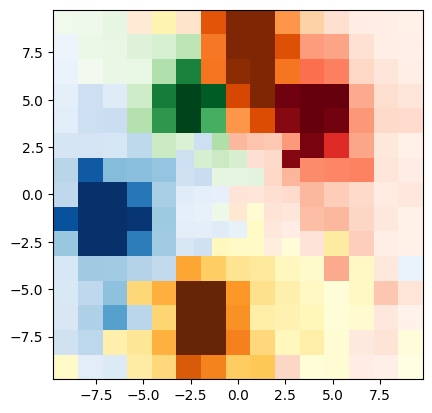

In [2]:
#filename = "/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E350_P1_N100.root"
#filename = "/home/bjartur/workspace/python_focalh_clustering/data/E150_P2_N100.root"
#filename = "/home/bjartur/workspace/focalh_data_transformer/data/converted/TRAIN_E350_N5600_GEN.root"

#filename = "/home/bjartur/workspace/python_focalh_clustering/data/train/TRAIN_E350_P1_N100.root"
filename = "/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E350_P5_N100.root"

def plot_single(filename, event=0, ax=None):
    if ax is None:
        fig,ax = plt.subplots(figsize=(10,10))
        
    tfile = ROOT.TFile(filename, "READ")
    ttree = tfile.Get("EventsTree")
    foc = FocalH()

    ttree.GetEntry(event)
    energy = np.array(ttree.energies, dtype=np.float32)
    labels = np.array(ttree.labels, dtype=np.float32)

    foc.heatmap_labels(ttree, event, ax)
    tfile.Close()

fig,ax = plt.subplots()
plot_single(filename, 61, ax)
#fig.savefig("single_particle_example.png", bbox_inches="tight")

#plot_single(filename, 1)

In [34]:
tfile = ROOT.TFile("/home/bjartur/workspace/focalh_data_transformer/data/converted/TRAIN_E350_N5600_GEN.root", "READ")
ttree = tfile.Get("EventsTree")
ttree.GetEntry(2)
npvals = np.array(ttree.value)
npvals.max()

np.float64(4095.0)

## Many events

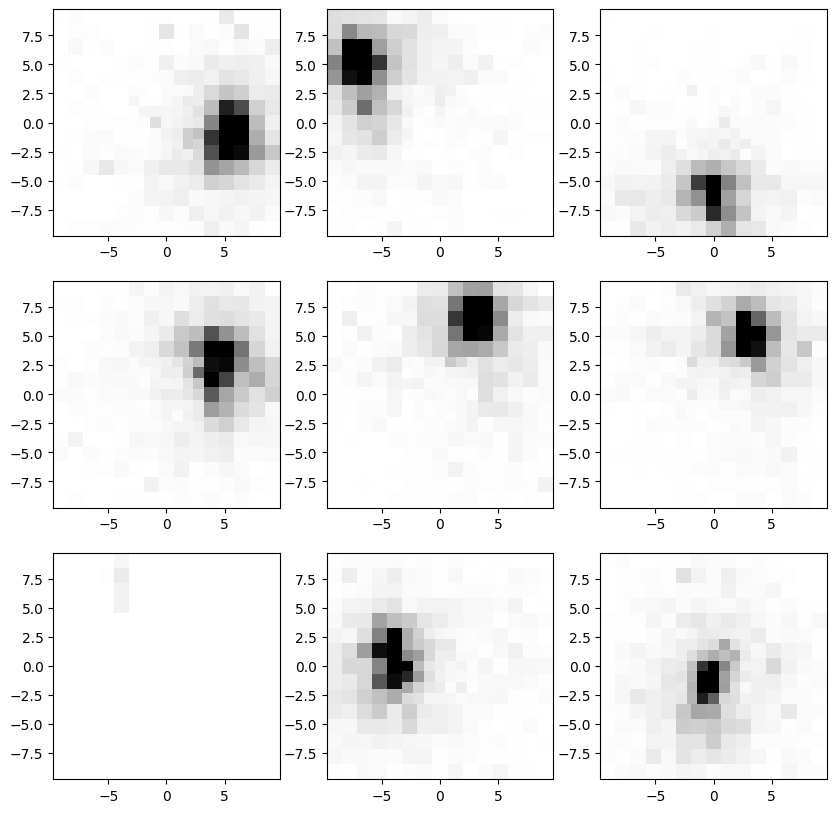

In [74]:
def plot_many(filename):
    tfile = ROOT.TFile(filename, "READ")
    ttree = tfile.Get("EventsTree")
    foc = FocalH()

    rows=3
    cols=3
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(10,10))
    ax = ax.flatten()

    iadj = np.load("p2_sim_adj_map2.npy")

    for i in range(rows*cols):
        ttree.GetEntry(i)
        vals = np.array(ttree.value, dtype=np.float32)
#        foc.heatmap_labels(ttree, i, ax[i])
        foc.heatmap_mono(vals[iadj], ax[i], color="grey_r")
    tfile.Close()


filename = "/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E300_P1_N100.root"
#file = ROOT.TFile("/home/bjartur/workspace/focalh_data_transformer/data/converted/E300_P2_N1000.root", "READ")
plot_many(filename)

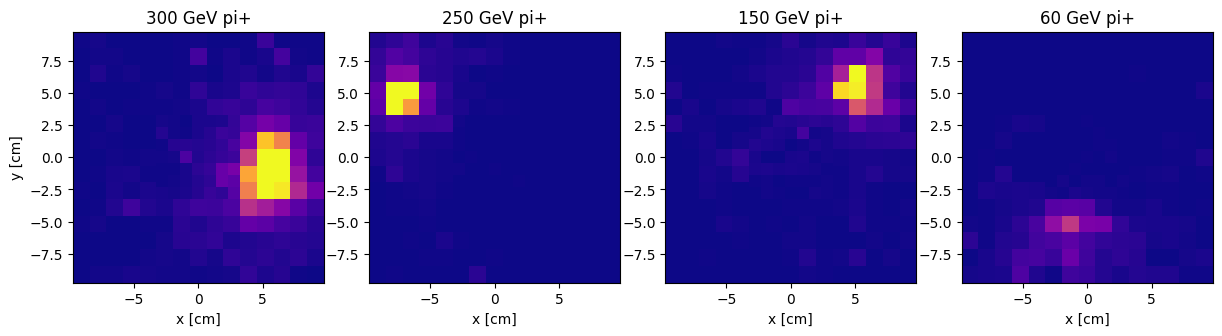

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,6))
ax=ax.flatten()

tfile = ROOT.TFile("/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E300_P1_N100.root", "READ")
ttree = tfile.Get("EventsTree")
foc = FocalH()
idx=0
ttree.GetEntry(idx)
vals = np.array(ttree.value, dtype=np.float32)
foc.heatmap_mono(vals[iadj], ax=ax[0], color="plasma")
tfile.Close()

tfile = ROOT.TFile("/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E250_P1_N100.root", "READ")
ttree = tfile.Get("EventsTree")
foc = FocalH()
idx=0
ttree.GetEntry(idx)
vals = np.array(ttree.value, dtype=np.float32)
foc.heatmap_mono(vals[iadj], ax=ax[1], color="plasma")
tfile.Close()

tfile = ROOT.TFile("/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E150_P1_N100.root", "READ")
ttree = tfile.Get("EventsTree")
foc = FocalH()
idx=0
ttree.GetEntry(idx)
vals = np.array(ttree.value, dtype=np.float32)
foc.heatmap_mono(vals[iadj], ax=ax[2], color="plasma")
tfile.Close()

tfile = ROOT.TFile("/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E60_P1_N100.root", "READ")
ttree = tfile.Get("EventsTree")
foc = FocalH()
idx=13
ttree.GetEntry(idx)
vals = np.array(ttree.value, dtype=np.float32)
foc.heatmap_mono(vals[iadj], ax=ax[3], color="plasma")
tfile.Close()


ax[0].set_title("300 GeV pi+")
ax[1].set_title("250 GeV pi+")
ax[2].set_title("150 GeV pi+")
ax[3].set_title("60 GeV pi+")

fig.tight_layout()

ax[0].set_ylabel("y [cm]")
for a in ax:
    a.set_xlabel("x [cm]")

fig.savefig("p2_heatmap_ex.png", bbox_inches="tight")

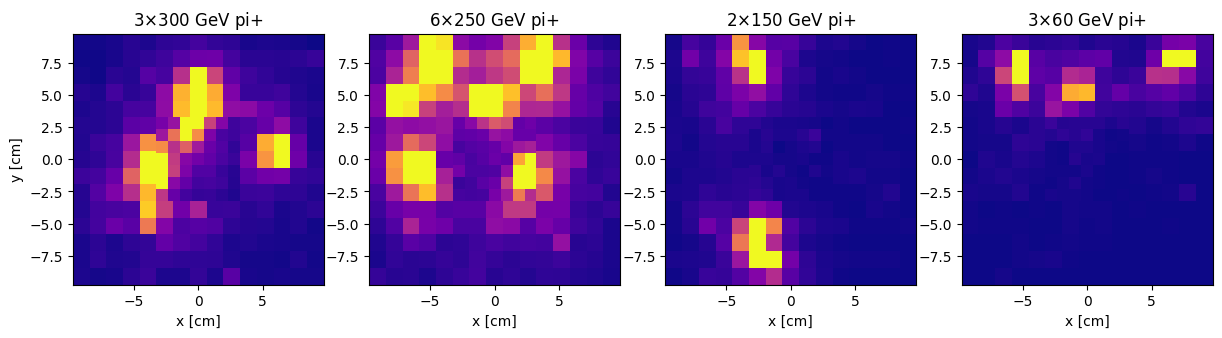

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,6))
ax=ax.flatten()

tfile = ROOT.TFile("/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E300_P3_N100.root", "READ")
ttree = tfile.Get("EventsTree")
foc = FocalH()
idx=0
ttree.GetEntry(idx)
vals = np.array(ttree.value, dtype=np.float32)
foc.heatmap_mono(vals[iadj], ax=ax[0], color="plasma")
tfile.Close()

tfile = ROOT.TFile("/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E250_P6_N100.root", "READ")
ttree = tfile.Get("EventsTree")
foc = FocalH()
idx=1
ttree.GetEntry(idx)
vals = np.array(ttree.value, dtype=np.float32)
foc.heatmap_mono(vals[iadj], ax=ax[1], color="plasma")
tfile.Close()

tfile = ROOT.TFile("/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E150_P2_N100.root", "READ")
ttree = tfile.Get("EventsTree")
foc = FocalH()
idx=0
ttree.GetEntry(idx)
vals = np.array(ttree.value, dtype=np.float32)
foc.heatmap_mono(vals[iadj], ax=ax[2], color="plasma")
tfile.Close()

tfile = ROOT.TFile("/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E60_P3_N100.root", "READ")
ttree = tfile.Get("EventsTree")
foc = FocalH()
idx=13
ttree.GetEntry(idx)
vals = np.array(ttree.value, dtype=np.float32)
foc.heatmap_mono(vals[iadj], ax=ax[3], color="plasma")
tfile.Close()


ax[0].set_title("3$\\times$300 GeV pi+")
ax[1].set_title("6$\\times$250 GeV pi+")
ax[2].set_title("2$\\times$150 GeV pi+")
ax[3].set_title("3$\\times$60 GeV pi+")

fig.tight_layout()

ax[0].set_ylabel("y [cm]")
for a in ax:
    a.set_xlabel("x [cm]")

fig.savefig("p2_heatmap_many_ex.png", bbox_inches="tight")

# Decompose a many-particle event

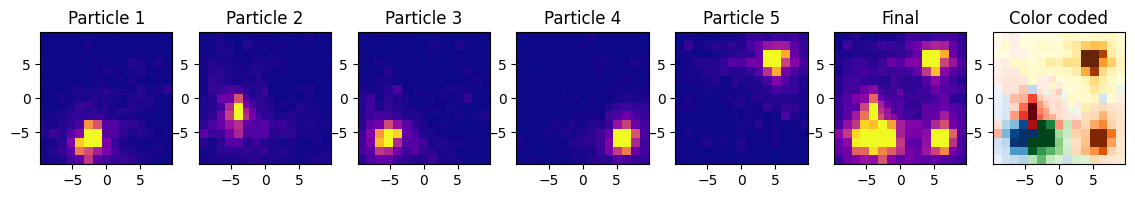

In [192]:
tfile = ROOT.TFile("/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E200_P5_N100.root", "READ")
ttree = tfile.Get("EventsTree")
foc = FocalH()
idx=3
ttree.GetEntry(idx)
vals = np.array(ttree.value, dtype=np.float32)
fracs = np.array(ttree.fractions, dtype=np.float32)
labels = np.array(ttree.labels, dtype=np.int32)

labs = set(labels)
N = len(labs)+2
fig,ax = plt.subplots(nrows=1, ncols=N, figsize=(2*N, N))
ax = ax.flatten()
for i,l in enumerate(labs):
    ax[i].set_title(f"Particle {i+1}")
    mask = labels == l
    v = fracs[mask] * vals
    foc.heatmap_mono(v[iadj], ax[i], color="plasma")
ax[-2].set_title("Final")
ax[-1].set_title("Color coded")

foc.heatmap_mono(vals[iadj], ax[-2], color="plasma")
foc.heatmap_labels(ttree, idx, ax[-1])
tfile.Close()
fig.savefig("p2_heatmap_decomp_5P.png", bbox_inches="tight")

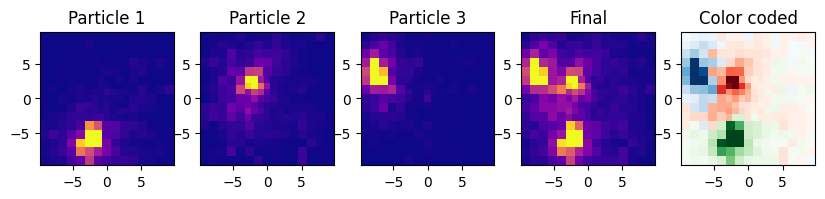

In [193]:
tfile = ROOT.TFile("/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E200_P3_N100.root", "READ")
ttree = tfile.Get("EventsTree")
foc = FocalH()
idx=3
ttree.GetEntry(idx)
vals = np.array(ttree.value, dtype=np.float32)
fracs = np.array(ttree.fractions, dtype=np.float32)
labels = np.array(ttree.labels, dtype=np.int32)

labs = set(labels)
N = len(labs)+2
fig,ax = plt.subplots(nrows=1, ncols=N, figsize=(2*N, N))
ax = ax.flatten()
for i,l in enumerate(labs):
    ax[i].set_title(f"Particle {i+1}")
    mask = labels == l
    v = fracs[mask] * vals
    foc.heatmap_mono(v[iadj], ax[i], color="plasma")
ax[-2].set_title("Final")
ax[-1].set_title("Color coded")

foc.heatmap_mono(vals[iadj], ax[-2], color="plasma")
foc.heatmap_labels(ttree, idx, ax[-1])
tfile.Close()
fig.savefig("p2_heatmap_decomp_3P.png", bbox_inches="tight")

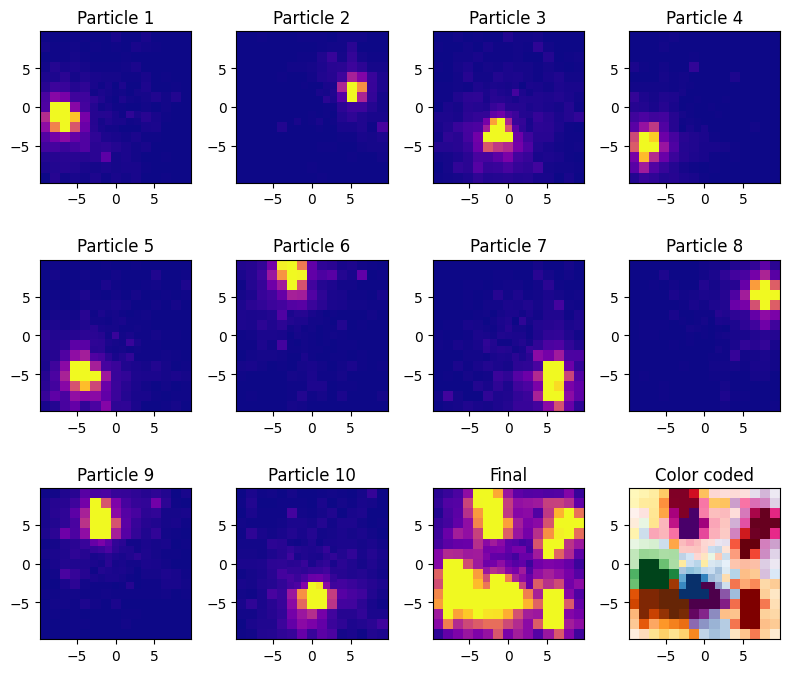

In [188]:
tfile = ROOT.TFile("/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E250_P10_N100.root", "READ")
ttree = tfile.Get("EventsTree")
foc = FocalH()
#idx=15
idx=25
ttree.GetEntry(idx)
vals = np.array(ttree.value, dtype=np.float32)
fracs = np.array(ttree.fractions, dtype=np.float32)
labels = np.array(ttree.labels, dtype=np.int32)

labs = set(labels)
N = len(labs)+2
fig,ax = plt.subplots(nrows=3, ncols=4, figsize=(8, 7))
ax = ax.flatten()
for i,l in enumerate(labs):
    ax[i].set_title(f"Particle {i+1}")
    mask = labels == l
    v = fracs[mask] * vals
    foc.heatmap_mono(v[iadj], ax[i], color="plasma")
ax[-2].set_title("Final")
ax[-1].set_title("Color coded")

foc.heatmap_mono(vals[iadj], ax[-2], color="plasma")
foc.heatmap_labels(ttree, idx, ax[-1])
tfile.Close()
fig.tight_layout()
fig.savefig("p2_heatmap_decomp_10P.png", bbox_inches="tight")